<a href="https://colab.research.google.com/github/mattyj7/capstone_c964/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import files
#uploaded = files.upload()


In [ ]:
# Step 1: Import library and file dependencies and check import of data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('diabetes_data.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
# Step 2: Check basic info of imported data
df.info()
df.describe()
df['Diabetes_binary'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

,count
Diabetes_binary,
0.0,35346
1.0,35346


Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
🔹 Accuracy with all features: 0.7484263384963576
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7090
         1.0       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



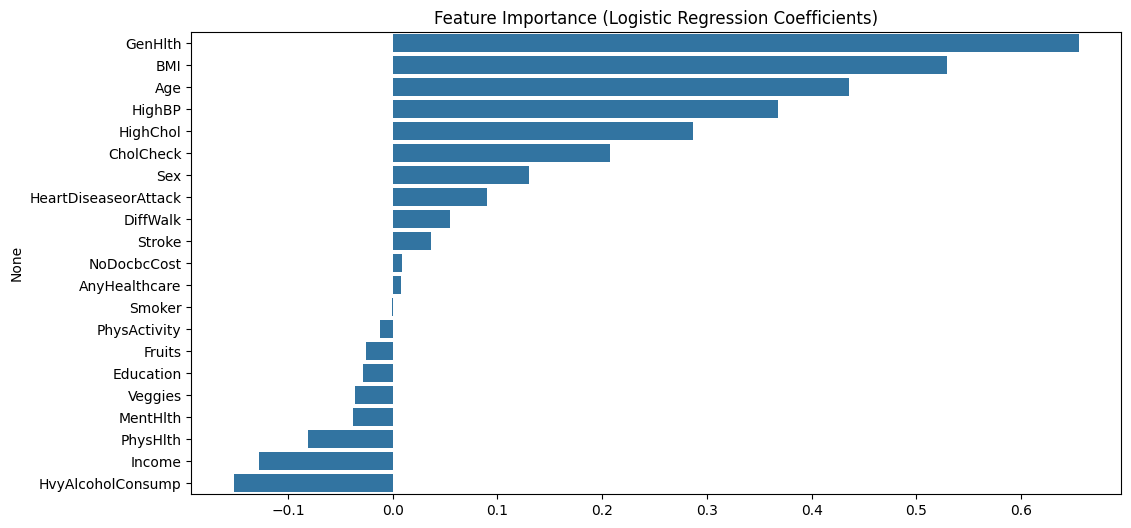

🔹 Top 10 features based on logistic regression coefficients: ['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck', 'HvyAlcoholConsump', 'Sex', 'Income', 'HeartDiseaseorAttack']
🔹 Accuracy with top 10 features: 0.7472239903812151
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7090
         1.0       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



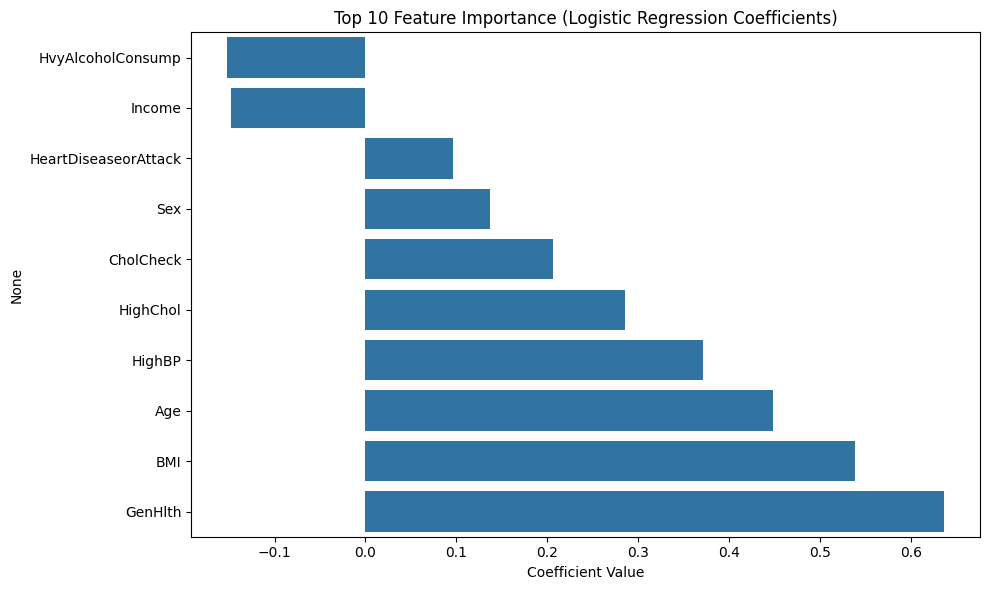

In [ ]:
# Step 3: Check for missing values (if needed)
print(df.isnull().sum())

# Step 4: Separate features and label
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Step 5: Scale features (important for regression models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Train-test split with 20% split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 7: Train logistic regression model with all features
model_all = LogisticRegression(max_iter=1000)
model_all.fit(X_train, y_train)

# Step 8: Predict and evaluate
y_pred_all = model_all.predict(X_test)

print("🔹 Accuracy with all features:", accuracy_score(y_test, y_pred_all))
print(classification_report(y_test, y_pred_all))

# Step 9: Show feature importance (coefficients)
feature_importance = pd.Series(model_all.coef_[0], index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

# Step 10: Select top 10 features based on absolute coefficient values
top_features = feature_importance.abs().sort_values(ascending=False).head(10).index.tolist()
print("🔹 Top 10 features based on logistic regression coefficients:", top_features)

# Step 11: Prepare dataset with top 10 features
X_top = df[top_features]

# Step 12: Scale selected features
X_top_scaled = scaler.fit_transform(X_top)

# Step 13: Train-test split using top features
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top_scaled, y, test_size=0.2, random_state=42)

# Step 14: Train model on top features
model_top = LogisticRegression(max_iter=1000)
model_top.fit(X_train_top, y_train_top)

# Step 15: Predict and evaluate using top features
y_pred_top = model_top.predict(X_test_top)

print("🔹 Accuracy with top 10 features:", accuracy_score(y_test_top, y_pred_top))
print(classification_report(y_test_top, y_pred_top))

# Optional: Plot top 10 coefficients
top_feature_importance = pd.Series(model_top.coef_[0], index=top_features).sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=top_feature_importance.values, y=top_feature_importance.index)
plt.title("Top 10 Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()


In [ ]:
# Step 4: Separate features and label
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Step 5: Scale features (important for regression models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Train-test split with 20% split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 7: Train logistic regression model with all features
model_all = LogisticRegression(max_iter=1000)
model_all.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

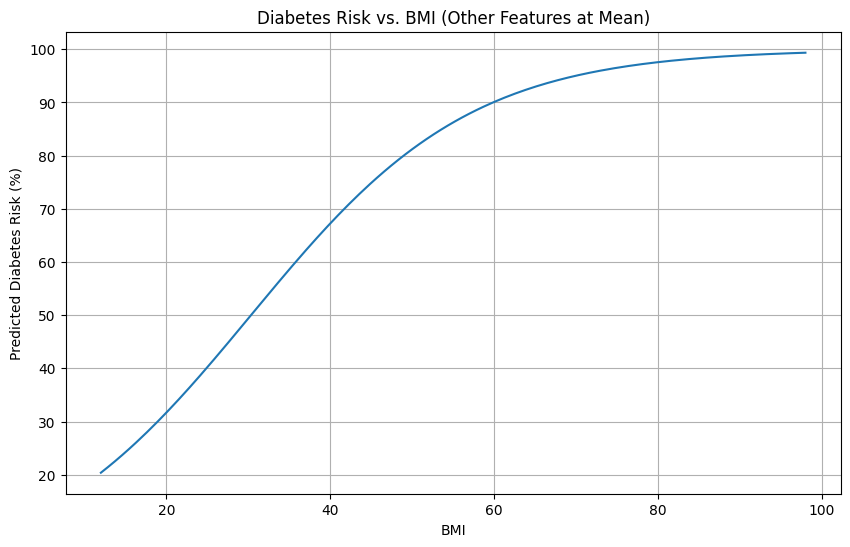

In [ ]:
# Feature to visualize
feature = "BMI"

# Create a range of values for the selected feature
feature_range = np.linspace(df[feature].min(), df[feature].max(), 200)

# Use all features from the original dataset (X.columns)
feature_columns = X.columns.tolist()

# Create a DataFrame with all feature values set to the mean of the dataset
mean_values = df[feature_columns].mean().to_frame().T
# Ensure the DataFrame has the same columns as X before repeating values
mean_df = pd.DataFrame(np.repeat(mean_values.values, 200, axis=0), columns=feature_columns)

# Replace the feature of interest (BMI) with a range of values
mean_df[feature] = feature_range


# Scale input using the same scaler that was fitted on X
mean_df_scaled = scaler.transform(mean_df)

# Predict probabilities of diabetes using the first model (model_all)
predicted_probs = model_all.predict_proba(mean_df_scaled)[:, 1]

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(x=feature_range, y=predicted_probs * 100)  # Predicted diabetes risk in percentage
plt.xlabel(f"{feature}")
plt.ylabel("Predicted Diabetes Risk (%)")
plt.title(f"Diabetes Risk vs. {feature} (Other Features at Mean)")
plt.grid(True)
plt.show()


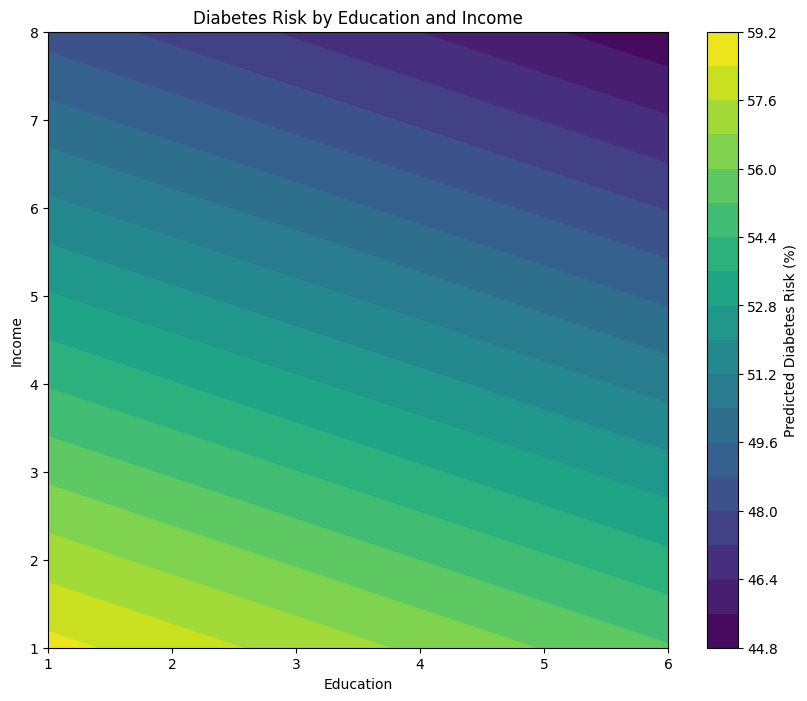

In [ ]:
# Define two features to vary
feature_x = "Education"
feature_y = "Income"

# Create ranges for each feature
x_range = np.linspace(df[feature_x].min(), df[feature_x].max(), 50)
y_range = np.linspace(df[feature_y].min(), df[feature_y].max(), 50)

# Create a meshgrid for plotting
xx, yy = np.meshgrid(x_range, y_range)

# Create a base input with all mean values
base = df[feature_columns].mean().to_frame().T

# Prepare an empty DataFrame to store all combinations
grid = pd.DataFrame(np.repeat(base.values, xx.size, axis=0), columns=feature_columns)

# Replace with meshgrid values
grid[feature_x] = xx.ravel()
grid[feature_y] = yy.ravel()

# Scale features
grid_scaled = scaler.transform(grid)

# Predict probabilities
probs = model_all.predict_proba(grid_scaled)[:, 1]
probs_grid = probs.reshape(xx.shape)

# Plot heatmap
plt.figure(figsize=(10, 8))
cp = plt.contourf(xx, yy, probs_grid * 100, levels=20, cmap="viridis")
plt.colorbar(cp, label="Predicted Diabetes Risk (%)")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title(f"Diabetes Risk by {feature_x} and {feature_y}")
plt.show()

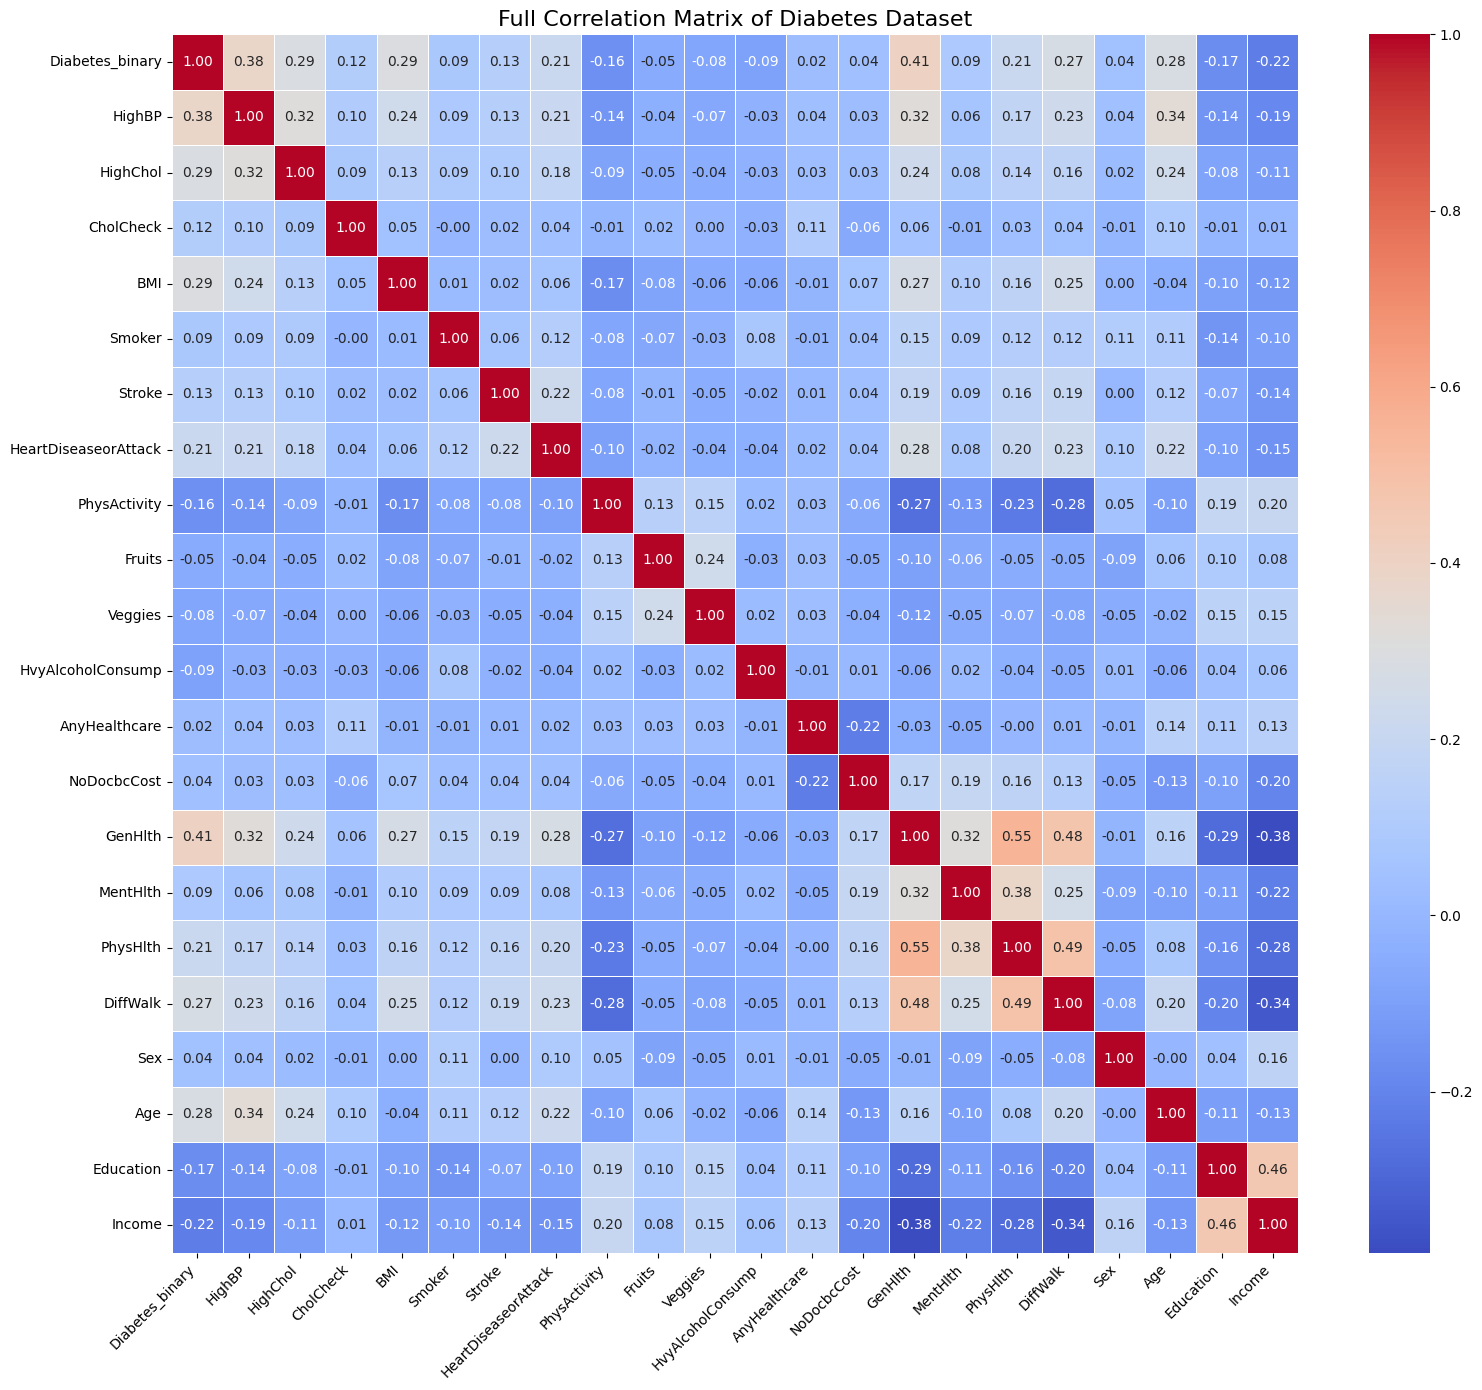

In [ ]:
# Compute full correlation matrix (only numeric columns)
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Full Correlation Matrix of Diabetes Dataset', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-120-41840eaf66ad>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Diabetes_binary', y=feature, data=df, palette='Set2', inner='quartile')


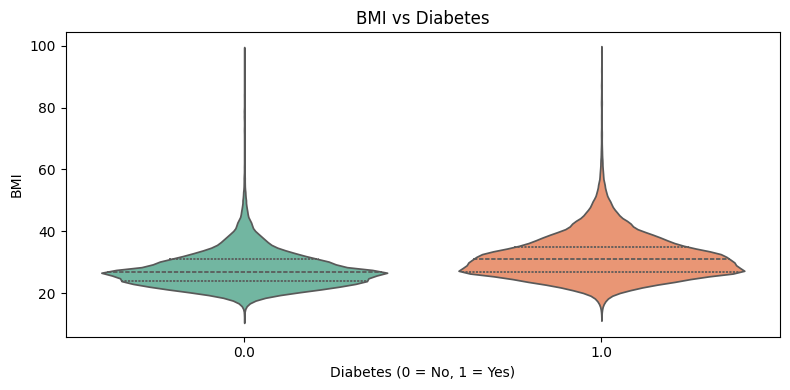

<ipython-input-120-41840eaf66ad>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Diabetes_binary', y=feature, data=df, palette='Set2', inner='quartile')


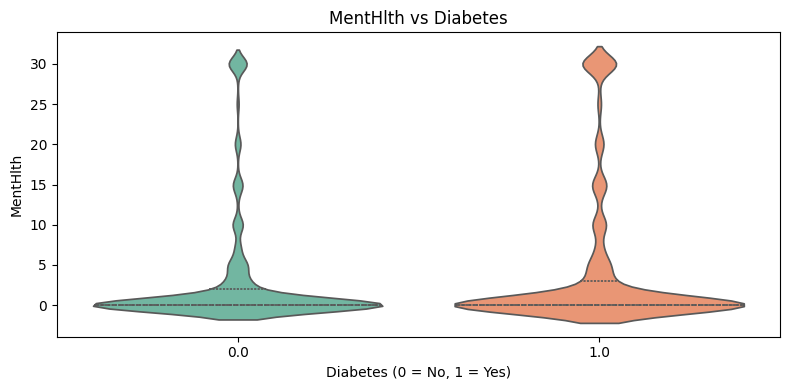

<ipython-input-120-41840eaf66ad>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Diabetes_binary', y=feature, data=df, palette='Set2', inner='quartile')


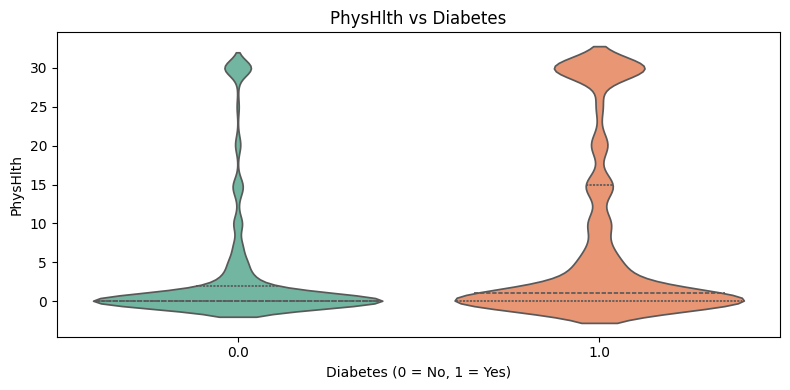

<ipython-input-120-41840eaf66ad>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Diabetes_binary', y=feature, data=df, palette='Set2', inner='quartile')


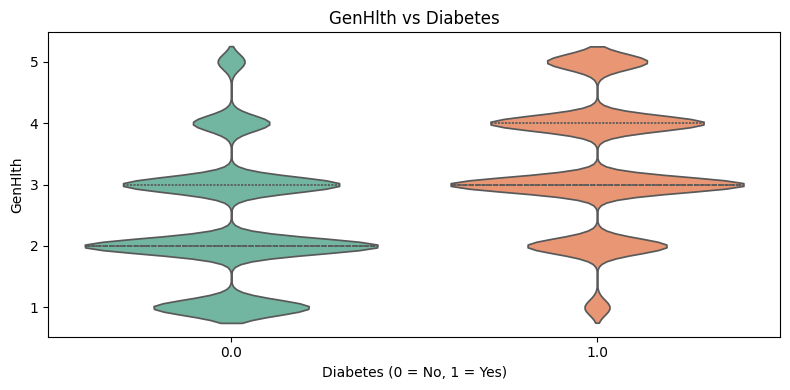

<ipython-input-120-41840eaf66ad>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Diabetes_binary', y=feature, data=df, palette='Set2', inner='quartile')


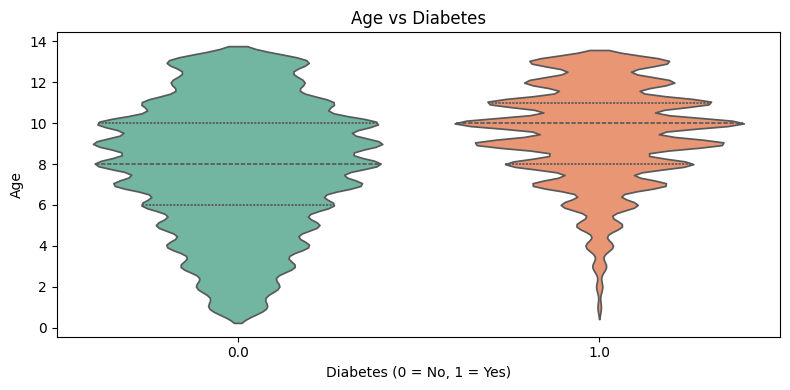

<ipython-input-120-41840eaf66ad>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Diabetes_binary', y=feature, data=df, palette='Set2', inner='quartile')


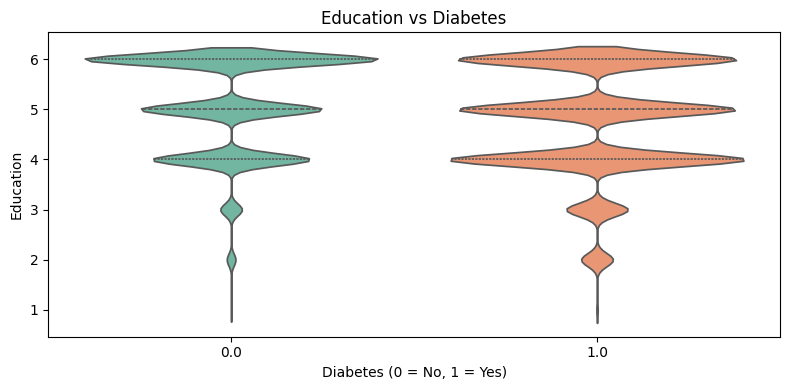

<ipython-input-120-41840eaf66ad>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Diabetes_binary', y=feature, data=df, palette='Set2', inner='quartile')


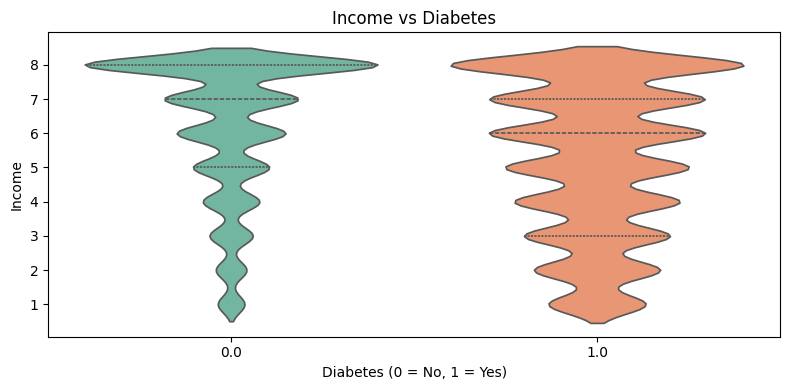

In [ ]:
features = ['BMI', 'MentHlth', 'PhysHlth', 'GenHlth', 'Age', 'Education', 'Income']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x='Diabetes_binary', y=feature, data=df, palette='Set2', inner='quartile')
    plt.title(f'{feature} vs Diabetes')
    plt.xlabel('Diabetes (0 = No, 1 = Yes)')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

<Axes: xlabel='Income', ylabel='Diabetes_binary'>

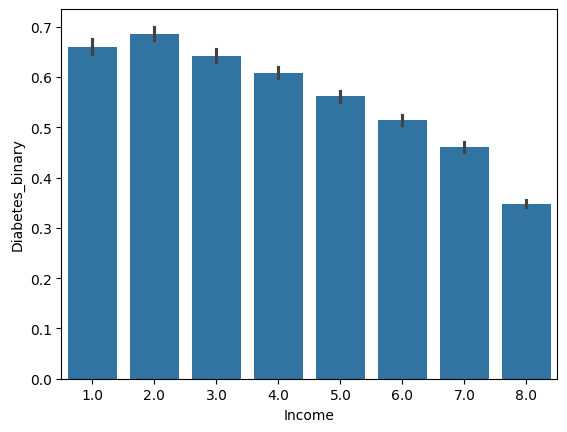

In [ ]:
sns.barplot(x='Income', y='Diabetes_binary', data=df, estimator='mean')


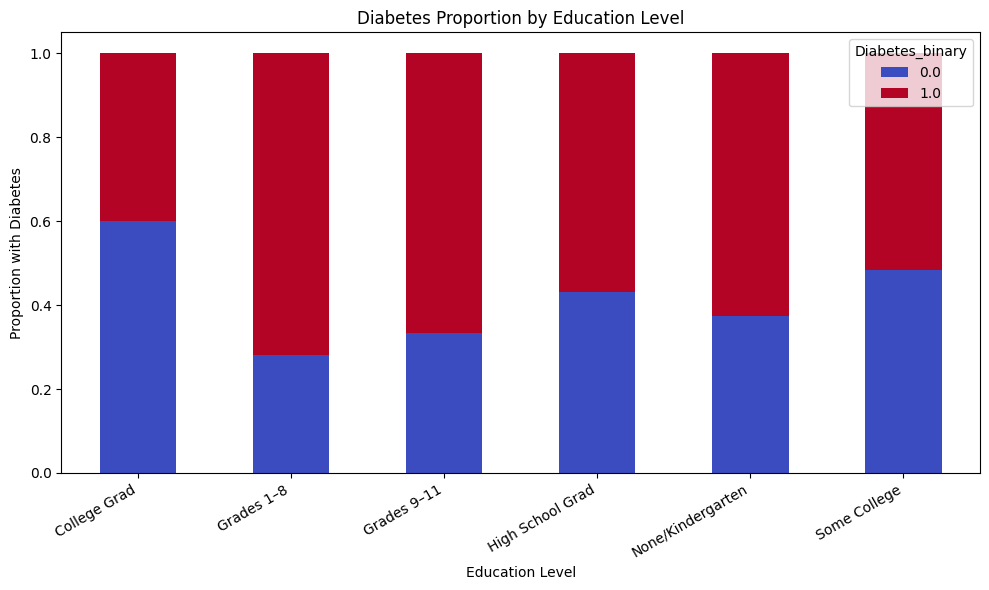

In [ ]:
education_labels = {
    1: 'None/Kindergarten',
    2: 'Grades 1–8',
    3: 'Grades 9–11',
    4: 'High School Grad',
    5: 'Some College',
    6: 'College Grad'
}

df['EducationLabel'] = df['Education'].map(education_labels)

ct_edu = pd.crosstab(df['EducationLabel'], df['Diabetes_binary'], normalize='index')
ct_edu.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.ylabel('Proportion with Diabetes')
plt.xlabel('Education Level')
plt.title('Diabetes Proportion by Education Level')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

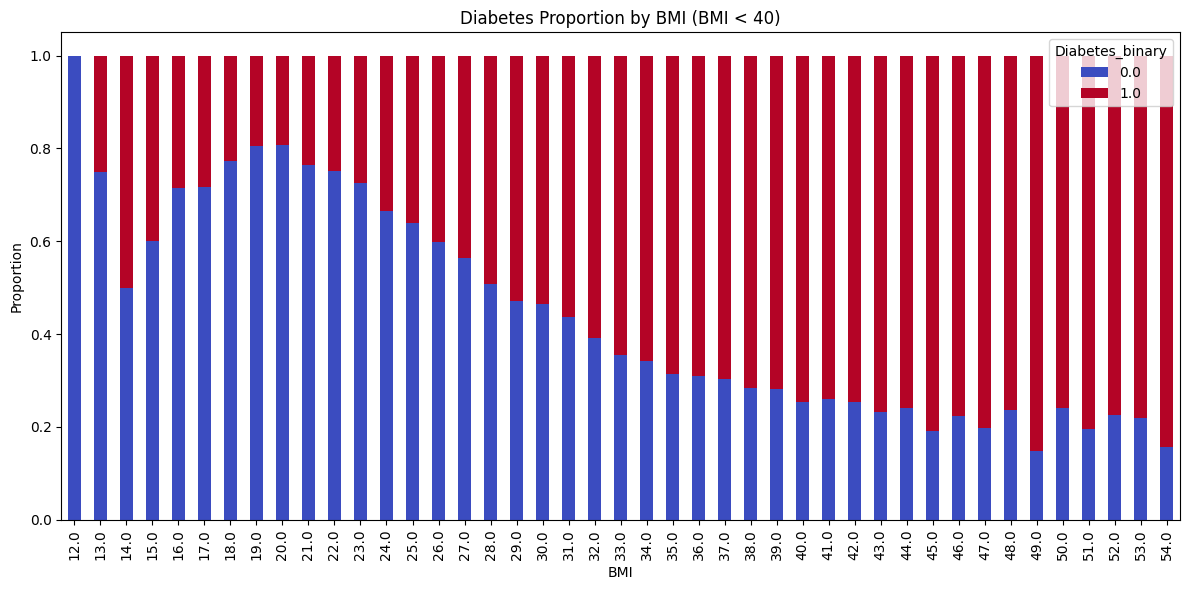

In [ ]:
# Filter rows where BMI < 40
df_filtered = df[df['BMI'] < 55]

# Create crosstab and plot
ct = pd.crosstab(df_filtered['BMI'], df_filtered['Diabetes_binary'], normalize='index')
ct.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6))
plt.ylabel('Proportion')
plt.title('Diabetes Proportion by BMI (BMI < 40)')
plt.xlabel('BMI')
plt.tight_layout()
plt.show()

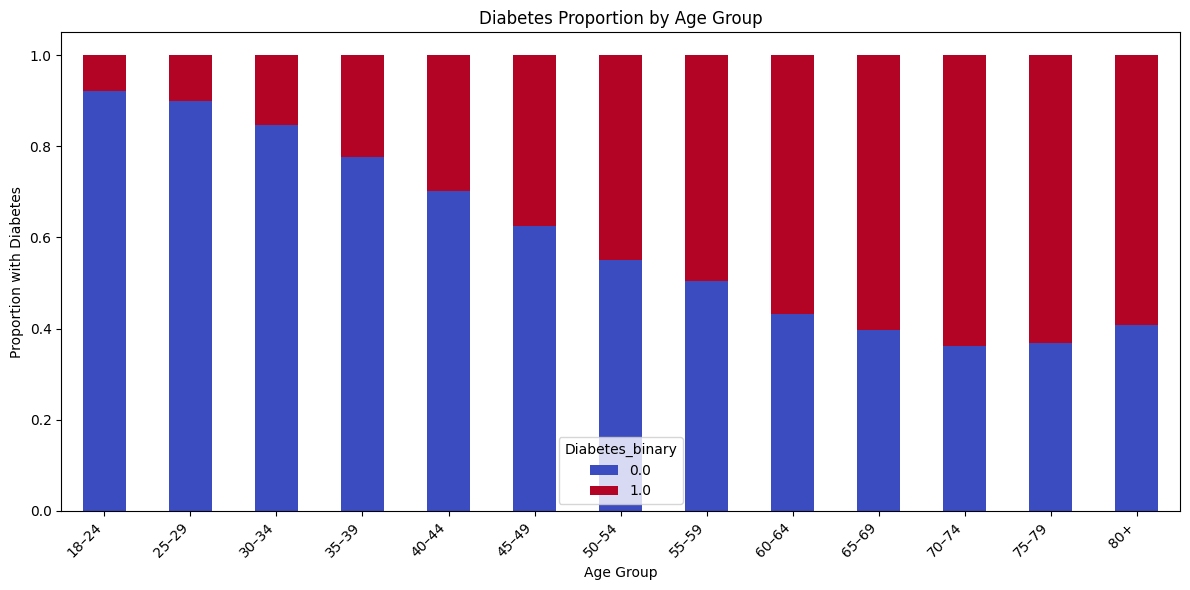

In [ ]:
age_labels = {
    1: '18–24',
    2: '25–29',
    3: '30–34',
    4: '35–39',
    5: '40–44',
    6: '45–49',
    7: '50–54',
    8: '55–59',
    9: '60–64',
    10: '65–69',
    11: '70–74',
    12: '75–79',
    13: '80+'
}

df['AgeLabel'] = df['Age'].map(age_labels)

ct_age = pd.crosstab(df['AgeLabel'], df['Diabetes_binary'], normalize='index')
ct_age.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6))
plt.ylabel('Proportion with Diabetes')
plt.xlabel('Age Group')
plt.title('Diabetes Proportion by Age Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-125-2cae3cb102e8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped.values, palette='coolwarm')


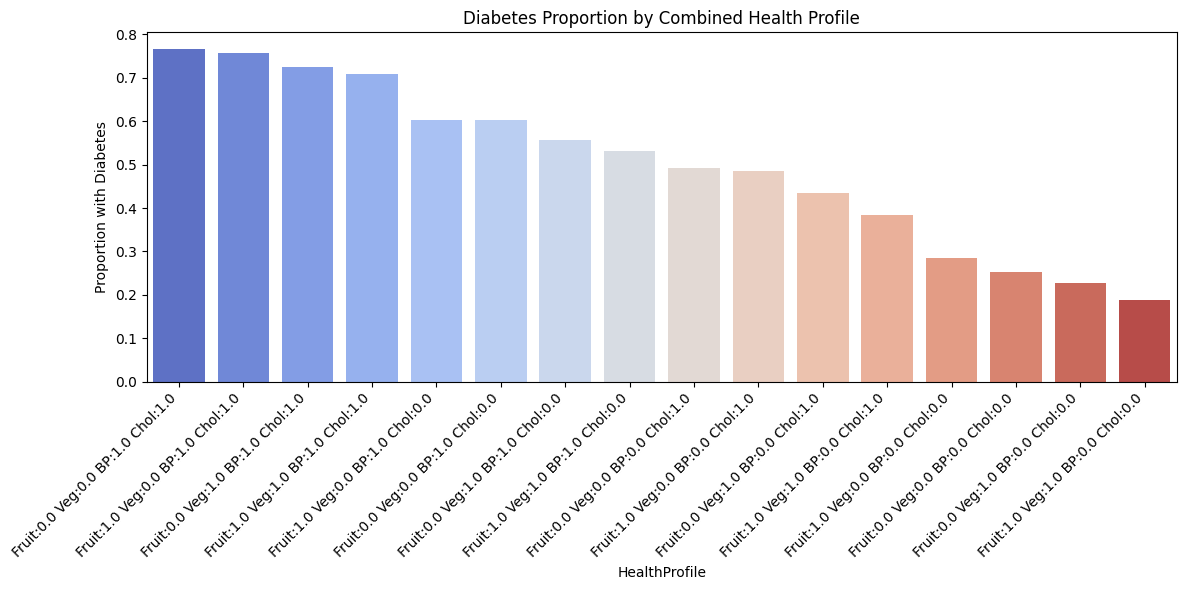

In [ ]:
df['HealthProfile'] = (
    'Fruit:' + df['Fruits'].astype(str) +
    ' Veg:' + df['Veggies'].astype(str) +
    ' BP:' + df['HighBP'].astype(str) +
    ' Chol:' + df['HighChol'].astype(str)
)

# Group by profile and compute diabetes rate
grouped = df.groupby('HealthProfile')['Diabetes_binary'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=grouped.index, y=grouped.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Proportion with Diabetes')
plt.title('Diabetes Proportion by Combined Health Profile')
plt.tight_layout()
plt.show()

<ipython-input-126-a63562a2f1e4>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combo_group.index, y=combo_group.values, palette='coolwarm')


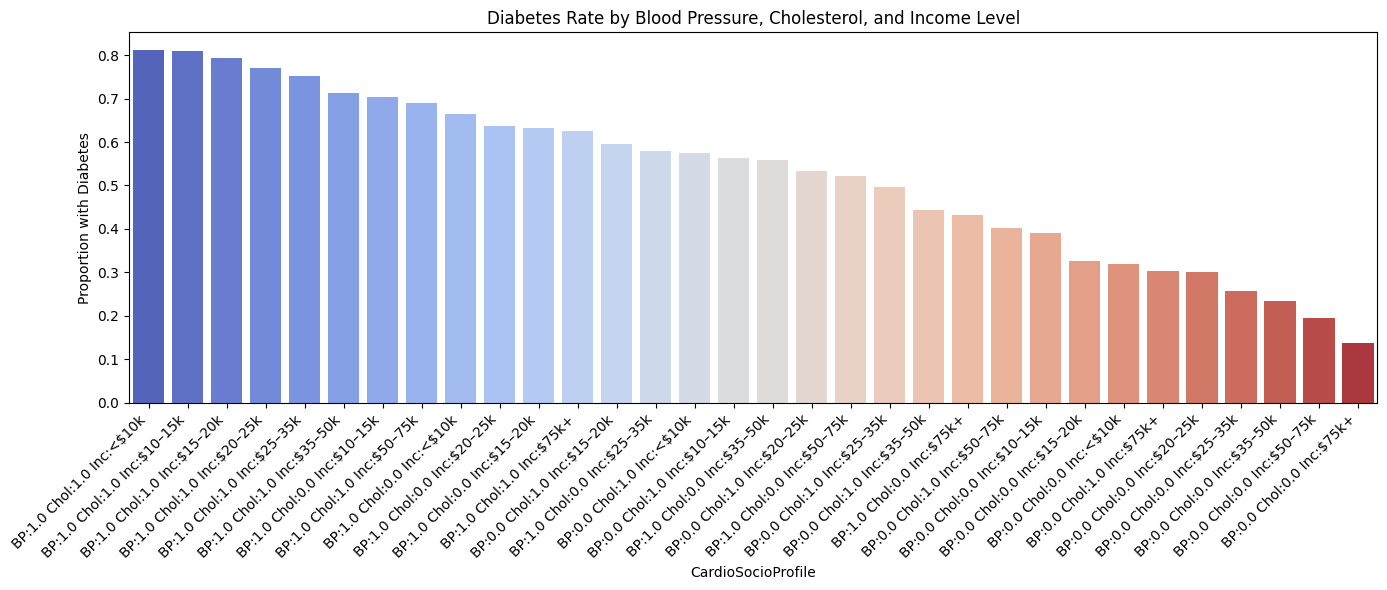

In [ ]:
# Optional: readable income labels
income_labels = {
    1: '<$10k', 2: '$10–15k', 3: '$15–20k', 4: '$20–25k',
    5: '$25–35k', 6: '$35–50k', 7: '$50–75k', 8: '$75k+'
}
df['IncomeLabel'] = df['Income'].map(income_labels)

# Combine features into a single profile string
df['CardioSocioProfile'] = (
    'BP:' + df['HighBP'].astype(str) +
    ' Chol:' + df['HighChol'].astype(str) +
    ' Inc:' + df['IncomeLabel']
)

# Group by profile and get diabetes rate
combo_group = df.groupby('CardioSocioProfile')['Diabetes_binary'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(x=combo_group.index, y=combo_group.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Proportion with Diabetes')
plt.title('Diabetes Rate by Blood Pressure, Cholesterol, and Income Level')
plt.tight_layout()
plt.show()

<ipython-input-127-e642e434d899>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped.values, palette='coolwarm')


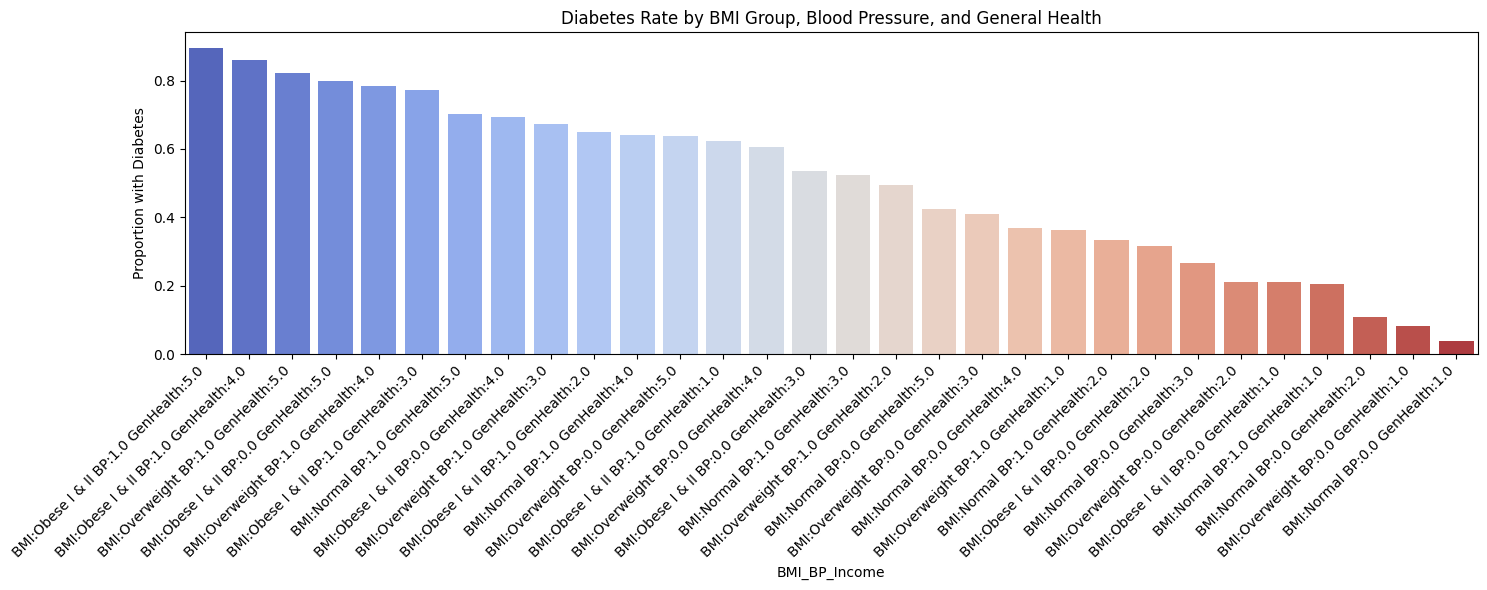

In [ ]:
# Group BMI into categories
bmi_bins = [0, 24.9, 34.9, 100]
bmi_labels = ['Normal', 'Overweight', 'Obese I & II']
df['BMIGroup'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)

# Map income to readable labels
#income_labels = {
#    1: '$10k', 2: '$10–15k', 3: '$15–20k', 4: '$20–25k',
#    5: '$25–35k', 6: '$35–50k', 7: '$50–75k', 8: '$75k+'
#}
#df['IncomeLabel'] = df['Income'].map(income_labels)

# Combine into a profile string
df['BMI_BP_Income'] = (
    'BMI:' + df['BMIGroup'].astype(str) +
    ' BP:' + df['HighBP'].astype(str) +
    ' GenHealth:' + df['GenHlth'].astype(str)
)

# Group and compute diabetes rate
grouped = df.groupby('BMI_BP_Income')['Diabetes_binary'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(15, 6))
sns.barplot(x=grouped.index, y=grouped.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Proportion with Diabetes')
plt.title('Diabetes Rate by BMI Group, Blood Pressure, and General Health')
plt.tight_layout()
plt.show()

<ipython-input-128-99a92c82df34>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heat_data = df.groupby(['BMIGroup', 'IncomeLabel'])['Diabetes_binary'].mean().unstack()


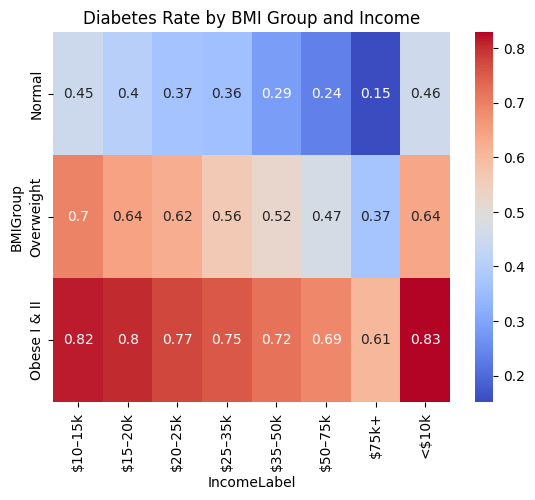

In [ ]:
heat_data = df.groupby(['BMIGroup', 'IncomeLabel'])['Diabetes_binary'].mean().unstack()
sns.heatmap(heat_data, annot=True, cmap='coolwarm')
plt.title("Diabetes Rate by BMI Group and Income")
plt.show()

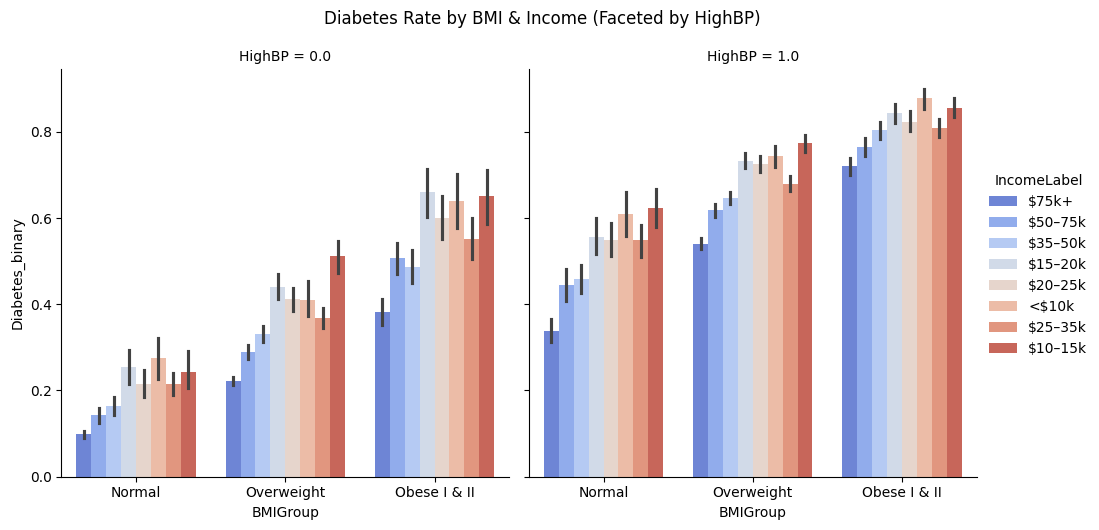

In [ ]:
g = sns.catplot(
    data=df, kind="bar",
    x="BMIGroup", y="Diabetes_binary", hue="IncomeLabel",
    col="HighBP", palette="coolwarm"
)
g.fig.suptitle("Diabetes Rate by BMI & Income (Faceted by HighBP)", y=1.05)
plt.show()

In [ ]:
## FOREST
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluation
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print("Random Forest Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

print("\nClassification Report:")
print(classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.7364735837046468
Precision: 0.7164820846905537
Recall: 0.7801106539934742
F1 Score: 0.7469437652811736

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.73      7090
         1.0       0.72      0.78      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store results
results = {}


# 2. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, rf_pred),
    'Precision': precision_score(y_test, rf_pred),
    'Recall': recall_score(y_test, rf_pred),
    'F1 Score': f1_score(y_test, rf_pred)
}

# 3. XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, xgb_pred),
    'Precision': precision_score(y_test, xgb_pred),
    'Recall': recall_score(y_test, xgb_pred),
    'F1 Score': f1_score(y_test, xgb_pred)
}

# Display results in a table
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:33:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


               Accuracy  Precision    Recall  F1 Score
Random Forest  0.736474   0.716482  0.780111  0.746944
XGBoost        0.748426   0.728116  0.790609  0.758077


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
print("Top 10 features:", selected_features.tolist())

Top 10 features: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth', 'Sex', 'Age', 'Income']
